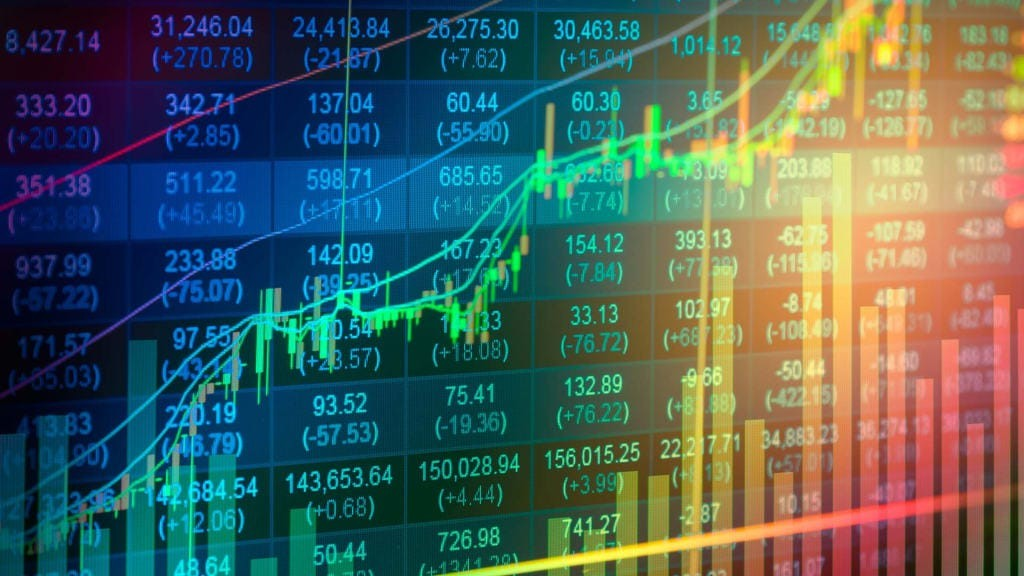

In [11]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\Fundamental Analysis Using Regression Techniques\\"
Image(filename = PATH + "0.JPG", width=1000, height=800)


In [4]:

# Fundamental stock analysis is a method used by investors to evaluate the intrinsic value of a stock by analyzing various 
# factors related to the underlying company's financial performance and overall health. It involves studying the company's 
# financial statements, business model, industry trends, management team, competitive positioning, and macroeconomic 
# factors to determine whether the stock is undervalued, overvalued, or fairly valued.

#  Key components of fundamental stock analysis include:

#  Financial Statements: Examining financial statements such as the income statement, balance sheet, and cash flow statement 
#  to assess revenue growth, profitability, liquidity, and financial stability.

#  Ratio Analysis: Calculating and analyzing various financial ratios such as price-to-earnings (P/E) ratio, 
#  price-to-book (P/B) ratio, debt-to-equity ratio, and return on equity (ROE) to gauge the company's financial 
#  health and valuation relative to its peers and industry standards.

#  Earnings Quality: Assessing the quality and sustainability of a company's earnings by scrutinizing factors such as 
#  revenue sources, operating margins, earnings growth consistency, and accounting practices.

#  Industry and Market Analysis: Evaluating industry dynamics, market trends, competitive landscape, and regulatory 
#  environment to understand the company's positioning within its industry and potential growth prospects.

#  Management and Governance: Evaluating the competence and integrity of the company's management team, corporate 
#  governance practices, and strategic decision-making processes.

#  Macroeconomic Factors: Considering broader economic indicators, interest rates, inflation rates, geopolitical events, 
#  and other macroeconomic factors that may impact the company's performance and stock price.

#  By conducting fundamental analysis, investors aim to make informed investment decisions based on the underlying value 
#  and potential future growth prospects of the company, rather than solely relying on short-term market trends or 
#  technical indicators.


# The ultimate goal here is to try to find stocks that will generate returns over and above what we may get from an 
# index fund, or some type of passive investment strategy. In addition, we will employ some data science techniques
# to enhance our analysis.

# Our first step is to fetch some fundamental stock data. Now, I know there are several ways to do this, and the example 
# below is just one of many ways to achieve the objective. 


In [224]:

import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
import itertools
import numpy as np
from itertools import chain
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

 
url_base = "https://finviz.com/quote.ashx?t="

tckr = ['AXP','AMGN','AAPL','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO','JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WBA','WMT','DIS']
     
i = 1

url_list = [(s, url_base + s) for s in tckr]
data_list = []

 
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:76.0) Gecko/20100101 Firefox/76.0'}

 
for t, url in url_list:
    print(i)
    i = i + 1
    print(t, url)
    print('Scrapping ticker {}...'.format(t))
    soup = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
    #writer.writerow([t])
    l = []
    for row in soup.select('.snapshot-table2 tr'):
        l.append([td.text for td in row.select('td')])
        x = list(chain.from_iterable(l))
        d = dict(zip(x[::2], x[1::2]))
        d['Index'] = t
    data_list.append(d)

df = pd.DataFrame(data_list)
df


1
AXP https://finviz.com/quote.ashx?t=AXP
Scrapping ticker AXP...
2
AMGN https://finviz.com/quote.ashx?t=AMGN
Scrapping ticker AMGN...
3
AAPL https://finviz.com/quote.ashx?t=AAPL
Scrapping ticker AAPL...
4
BA https://finviz.com/quote.ashx?t=BA
Scrapping ticker BA...
5
CAT https://finviz.com/quote.ashx?t=CAT
Scrapping ticker CAT...
6
CSCO https://finviz.com/quote.ashx?t=CSCO
Scrapping ticker CSCO...
7
CVX https://finviz.com/quote.ashx?t=CVX
Scrapping ticker CVX...
8
GS https://finviz.com/quote.ashx?t=GS
Scrapping ticker GS...
9
HD https://finviz.com/quote.ashx?t=HD
Scrapping ticker HD...
10
HON https://finviz.com/quote.ashx?t=HON
Scrapping ticker HON...
11
IBM https://finviz.com/quote.ashx?t=IBM
Scrapping ticker IBM...
12
INTC https://finviz.com/quote.ashx?t=INTC
Scrapping ticker INTC...
13
JNJ https://finviz.com/quote.ashx?t=JNJ
Scrapping ticker JNJ...
14
KO https://finviz.com/quote.ashx?t=KO
Scrapping ticker KO...
15
JPM https://finviz.com/quote.ashx?t=JPM
Scrapping ticker JPM...
16
M

Index     P/E EPS (ttm) Insider Own Shs Outstand Perf Week Market Cap  \
0    AXP   18.95     11.22       0.15%      723.00M     0.04%    153.87B   
1   AMGN   22.72     12.48       0.22%      535.40M    -2.55%    152.04B   
2   AAPL   28.37      6.43       0.09%       15.55B    -3.46%   2815.21B   
3     BA       -     -3.67       0.16%      609.52M    -2.54%    124.40B   
4    CAT   15.98     20.14       0.22%      509.08M     1.50%    163.88B   
5   CSCO   14.74      3.29       0.22%        4.07B    -3.37%    196.83B   
6    CVX   13.63     11.35       0.03%        1.92B     2.38%    291.02B   
7     GS   16.84     22.82       0.55%      337.10M     0.05%    125.37B   
8     HD   23.25     15.58       0.26%        1.02B    -0.22%    360.63B   
9    HON   23.28      8.47       0.08%      659.25M     1.20%    129.98B   
10   IBM   23.09      8.13       0.09%      913.12M     0.70%    171.34B   
11  INTC  112.78      0.39       0.05%        4.23B     0.46%    183.96B   
12   JNJ   28.07      5.58       0.16%        2.41B    -0.13%    376.86B   
13    KO   24.06      2.47       0.63%        4.31B    -0.29%    256.77B   
14   JPM   11.04     16.22       0.99%        2.88B     2.30%    517.58B   
15   MCD   25.25     11.57       0.04%      744.80M     0.88%    211.81B   
16   MMM       -    -12.63       0.11%      552.58M    -1.78%     50.43B   
17   MRK  966.64      0.13       0.15%        2.54B     1.87%    323.82B   
18  MSFT   36.54     11.06       1.51%        7.43B    -3.92%   3002.34B   
19   NKE   30.23      3.42      22.37%        1.23B    -0.95%    156.84B   
20    PG   26.38      5.97       0.06%        2.36B     0.06%    370.62B   
21   TRV   16.95     12.84       0.39%      229.13M     1.41%     49.84B   
22   UNH   21.87     23.85       0.17%      934.00M     0.64%    482.39B   
23   CRM  109.97      2.63       3.19%        1.01B    -0.54%    280.45B   
24    VZ   14.69      2.76       0.03%        4.20B     1.94%    170.23B   
25     V   32.57      8.55      21.41%        1.59B     0.77%    558.94B   
26   WBA   33.06      0.66      17.54%      863.67M    -1.17%     18.96B   
27   WMT   28.28      6.02      46.69%        2.69B     0.64%    458.65B   
28   DIS   68.55      1.63       0.06%        1.83B     2.96%    204.71B   

   Forward P/E EPS next Y Insider Trans Shs Float Perf Month     Income  \
0        14.38     14.88%       -24.83%   722.88M     18.23%      8.25B   
1        13.33      8.25%        -1.02%   534.74M     -6.83%      6.72B   
2        25.55      8.65%        -4.40%    15.43B     -3.35%    100.91B   
3        25.37    126.95%         0.00%   609.20M     -3.65%  -2222.00M   
4        14.42      5.13%        -5.43%   507.88M     14.19%     10.34B   
5        12.69      2.26%        -5.24%     4.05B     -4.55%     13.44B   
6        11.00      9.27%         0.00%     1.88B      9.03%     21.37B   
7         9.78     15.66%        -1.24%   324.31M      2.00%      7.91B   
8        23.28      3.34%        -0.97%   992.49M      1.24%     15.70B   
9        18.27      8.42%       -14.78%   658.70M     -1.48%      5.66B   
10       17.61      5.82%        -1.18%   912.24M     12.47%      7.50B   
11       19.47     63.59%         0.60%     4.23B     -6.91%      1.69B   
12       14.23      3.15%        -1.52%     2.40B     -2.89%     14.17B   
13       19.76      6.72%        -1.86%     4.30B     -1.28%     10.71B   
14       11.11      1.26%        -2.54%     2.86B      6.93%     47.76B   
15       21.55      8.99%       -13.97%   724.84M     -0.79%      8.47B   
16        8.84      7.61%        -0.07%   552.10M    -14.27%  -6995.00M   
17       13.23     13.13%       -10.70%     2.53B      7.80%    365.00M   
18       30.24     14.89%        -0.12%     7.32B      2.59%     82.54B   
19       24.51     17.17%        -0.07%     1.18B      2.55%      5.30B   
20       22.60      7.88%       -25.79%     2.35B      6.33%     14.49B   
21       10.50     14.06%       -22.24%   228.24M      9.67%      2.97B 

In [225]:

# Next, we will copy the 'Index' to a new dataframe and then drop the 'Index' column to prepare for the cleanup process 
# described directly below.


df_index = df[['Index']].copy()
df = df.drop('Index', axis=1)
print(df.shape)


# cleanup dataframe; get rid of text characters...
# clean 'B' for billions and 'M' for millions
# we do NOT want to get rid of 'B' and 'M' characters in tickers

 
df = df.replace({'%':''},regex=True)
df = df.replace({',':''},regex=True)
df = df.replace({'M':'000'},regex=True)
df = df.replace({'B':'000000'},regex=True)

 
# convert ALL COLUMNS to floats
cols = df.columns
df[cols[0:]] = df[cols[0:]].apply(pd.to_numeric, errors='coerce')

# Fill all NA with Zeros
df = df.fillna(0)

# here we rejoin the two dataframes; the tickers and the cleaned data
# df_fin = pd.merge(df_index, df, left_index=True, right_index=True) 
df.head()


(29, 76)


P/E  EPS (ttm)  Insider Own  Shs Outstand  Perf Week  Market Cap  \
0  18.95      11.22         0.15        723.00       0.04      153.87   
1  22.72      12.48         0.22        535.40      -2.55      152.04   
2  28.37       6.43         0.09         15.55      -3.46     2815.21   
3   0.00      -3.67         0.16        609.52      -2.54      124.40   
4  15.98      20.14         0.22        509.08       1.50      163.88   

   Forward P/E  EPS next Y  Insider Trans  Shs Float  Perf Month   Income  \
0        14.38       14.88         -24.83     722.88       18.23     8.25   
1        13.33        8.25          -1.02     534.74       -6.83     6.72   
2        25.55        8.65          -4.40      15.43       -3.35   100.91   
3        25.37      126.95           0.00     609.20       -3.65 -2222.00   
4        14.42        5.13          -5.43     507.88       14.19    10.34   

    PEG  EPS next Q  Inst Own  Short Float  Perf Quarter   Sales   P/S  \
0  1.30        2.97     86.84         1.12         33.32   67.38  2.28   
1  4.08        4.00     77.92         1.74          3.91   28.01  5.43   
2  2.58        1.52     61.60         0.64         -3.03  385.71  7.30   
3  0.00       -0.56     64.84         1.59         -2.31   77.79  1.60   
4  1.26        5.12     70.93         1.56         28.21   67.06  2.44   

   EPS this Y  Inst Trans  Short Ratio  Perf Half Y  Book/sh    P/B    ROA  \
0       14.74       -0.49         2.40        32.37    38.81   5.48   3.38   
1        5.35       -1.48         3.44         7.52    11.64  24.37   8.28   
2        7.12       -0.48         1.86         4.78     4.79  38.04  28.82   
3      160.94        1.06         1.05        -9.20   -28.27   0.00  -1.62   
4        0.15       -1.87         2.72        16.99    39.04   8.25  12.20   

   Short Interest  Perf Year  Cash/sh    P/C  EPS next 5Y     ROE  52W Range  \
0            8.07      17.65    64.37   3.30        14.60   31.50        0.0   
1            9.30      18.18    20.42  13.89         5.57  135.79        0.0   
2           99.24      17.37     4.73  38.51        11.00  154.27        0.0   
3            9.71      -6.23    26.17   7.79         0.00    0.00        0.0   
4            7.91      29.44    13.71  23.48        12.66   58.45        0.0   

   Perf YTD  Dividend Est.  P/FCF  EPS past 5Y    ROI  52W High  Beta  \
0     13.46            0.0   9.06         7.25  12.59     -0.79  1.23   
1     -1.50            0.0  20.66        -0.22   9.58    -13.96  0.60   
2     -5.31            0.0  26.34        15.55  59.65     -8.67  1.30   
3    -21.78            0.0  28.06         0.00  -7.08    -23.79  1.53   
4      8.87            0.0  16.73        14.42  23.28     -3.87  1.14   

   Dividend TTM  Quick Ratio  Sales past 5Y  Gross Margin  52W Low  ATR (14)  \
0           0.0         0.00          10.54         61.63    50.85      3.50   
1           0.0         1.13           3.42         69.83    34.00      6.77   
2           0.0         1.02           8.34         45.03    26.69      3.18   
3           0.0         0.31          -3.50          9.91    15.68      5.81   
4           0.0         0.87           5.49         34.85    57.77      7.30   

   Dividend Ex-Date  Current Ratio  EPS Y/Y TTM  Oper. Margin  RSI (14)  \
0               0.0           0.00        13.96         18.55     74.69   
1               0.0           1.65         3.15         29.34     32.99   
2               0.0           1.07         9.05         30.76     36.58   
3               0.0           1.14        55.78         -1.05     39.39   
4               0.0           1.35        59.12         20.36     64.57   

   Volatility  Employees  Debt/Eq  Sales Y/Y TTM  Profit Margin  Recom  \
0         0.0      74600     1.75          21.13          12.25   2.10   
1         0.0      26700    10.50           7.35          23.98   2.32   
2         0.0     161000     1.46          -0.47          26.16   2.16   
3         0.0     171000     0.00        

In [203]:

# We have some columns where all values are 0. These zeros were generated by the clean up process. 

print(df.shape)
df = df.loc[:, (df != 0).any(axis=0)]
print(df.shape)
df.head()


(29, 76)
(29, 68)


P/E  EPS (ttm)  Insider Own  Shs Outstand  Perf Week  Market Cap  \
0  18.95      11.22         0.15        723.00       0.04      153.87   
1  22.72      12.48         0.22        535.40      -2.55      152.04   
2  28.37       6.43         0.09         15.55      -3.46     2815.21   
3   0.00      -3.67         0.16        609.52      -2.54      124.40   
4  15.98      20.14         0.22        509.08       1.50      163.88   

   Forward P/E  EPS next Y  Insider Trans  Shs Float  Perf Month   Income  \
0        14.38       14.88         -24.83     722.88       18.23     8.25   
1        13.33        8.25          -1.02     534.74       -6.83     6.72   
2        25.55        8.65          -4.40      15.43       -3.35   100.91   
3        25.37      126.95           0.00     609.20       -3.65 -2222.00   
4        14.42        5.13          -5.43     507.88       14.19    10.34   

    PEG  EPS next Q  Inst Own  Short Float  Perf Quarter   Sales   P/S  \
0  1.30        2.97     86.84         1.12         33.32   67.38  2.28   
1  4.08        4.00     77.92         1.74          3.91   28.01  5.43   
2  2.58        1.52     61.60         0.64         -3.03  385.71  7.30   
3  0.00       -0.56     64.84         1.59         -2.31   77.79  1.60   
4  1.26        5.12     70.93         1.56         28.21   67.06  2.44   

   EPS this Y  Inst Trans  Short Ratio  Perf Half Y  Book/sh    P/B    ROA  \
0       14.74       -0.49         2.40        32.37    38.81   5.48   3.38   
1        5.35       -1.48         3.44         7.52    11.64  24.37   8.28   
2        7.12       -0.48         1.86         4.78     4.79  38.04  28.82   
3      160.94        1.06         1.05        -9.20   -28.27   0.00  -1.62   
4        0.15       -1.87         2.72        16.99    39.04   8.25  12.20   

   Short Interest  Perf Year  Cash/sh    P/C  EPS next 5Y     ROE  Perf YTD  \
0            8.07      17.65    64.37   3.30        14.60   31.50     13.46   
1            9.30      18.18    20.42  13.89         5.57  135.79     -1.50   
2           99.24      17.37     4.73  38.51        11.00  154.27     -5.31   
3            9.71      -6.23    26.17   7.79         0.00    0.00    -21.78   
4            7.91      29.44    13.71  23.48        12.66   58.45      8.87   

   P/FCF  EPS past 5Y    ROI  52W High  Beta  Quick Ratio  Sales past 5Y  \
0   9.06         7.25  12.59     -0.79  1.23         0.00          10.54   
1  20.66        -0.22   9.58    -13.96  0.60         1.13           3.42   
2  26.34        15.55  59.65     -8.67  1.30         1.02           8.34   
3  28.06         0.00  -7.08    -23.79  1.53         0.31          -3.50   
4  16.73        14.42  23.28     -3.87  1.14         0.87           5.49   

   Gross Margin  52W Low  ATR (14)  Current Ratio  EPS Y/Y TTM  Oper. Margin  \
0         61.63    50.85      3.50           0.00        13.96         18.55   
1         69.83    34.00      6.77           1.65         3.15         29.34   
2         45.03    26.69      3.18           1.07         9.05         30.76   
3          9.91    15.68      5.81           1.14        55.78         -1.05   
4         34.85    57.77      7.30           1.35        59.12         20.36   

   RSI (14)  Employees  Debt/Eq  Sales Y/Y TTM  Profit Margin  Recom  \
0     74.69      74600     1.75          21.13          12.25   2.10   
1     32.99      26700    10.50           7.35          23.98   2.32   
2     36.58     161000     1.46          -0.47          26.16   2.16   
3     39.39     171000     0.00          16.80          -2.86   1.73   
4     64.57     113200     1.97          12.84          15.41   2.44   

   Target Price  LT Debt/Eq  EPS Q/Q  Payout  Rel Volume  Prev Close  \
0        215.82        1.34    26.55   21.41        0.84      212.53   
1        306.31       10.25   -52.62   68.24        1.33      289.07   
2        199.51        1.28    15.81   15.32        0.91      183.86   
3        261.73        0.00    96.44    0.00        0.6

In [5]:

# With the data downloaded and refined, we can send the results to our first model, a RandomForestRegressor. This will 
# help us determine the importance of all the independent features, on the dependent feature, which is set as ‘Change’. 
# So, all the independent variables, we are trying to understand which has the most impact on ‘Change’. If we know what 
# influences stock price changes over time, maybe we can pick stocks that will appreciate in value the most, based on 
# the features that affect the price changes the most.


# Let’s pause now, and explain exactly what’s happening here. Random Forest Regression is a supervised learning algorithm 
# that uses ensemble learning method for regression. An ensemble learning method is a technique that combines predictions 
# from multiple machine learning algorithms to make a more accurate prediction than what is possible by using only a single 
# model. The problem with a single tree is that a slight change in data may lead to an entirely different outcome, thus 
# causing the model to give incorrect predictions. Also, decisions trees are very sensitive to the data they are trained 
# on and small changes to the training set can result in significantly different tree structures. Finally, decision trees 
# tend to find locally optimal solutions rather than considering the globally optimal ones. The random forest model will 
# overcome these limitations due to a concept known as ‘the wisdom of crowds’ wherein a large number of uncorrelated 
# models operating as a committee will outperform any of the individual constituent models, if run by themselves.


# Let’s consider a second approach to solving the problem of picking winning stocks. XGBoost is a another powerful 
# approach for building supervised regression models. The validity of this statement can be inferred by knowing about 
# its (XGBoost) objective function and base learners. The objective function contains a loss function and a regularization 
# term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods available to us today. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

 
# Here is an image that illustrates the points described above. 


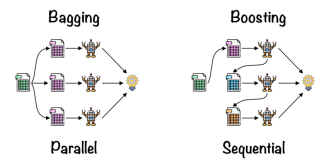

In [9]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Fundamental Analysis Using Regression Techniques\\"
Image(filename = PATH + "1.JPG", width=600, height=600)


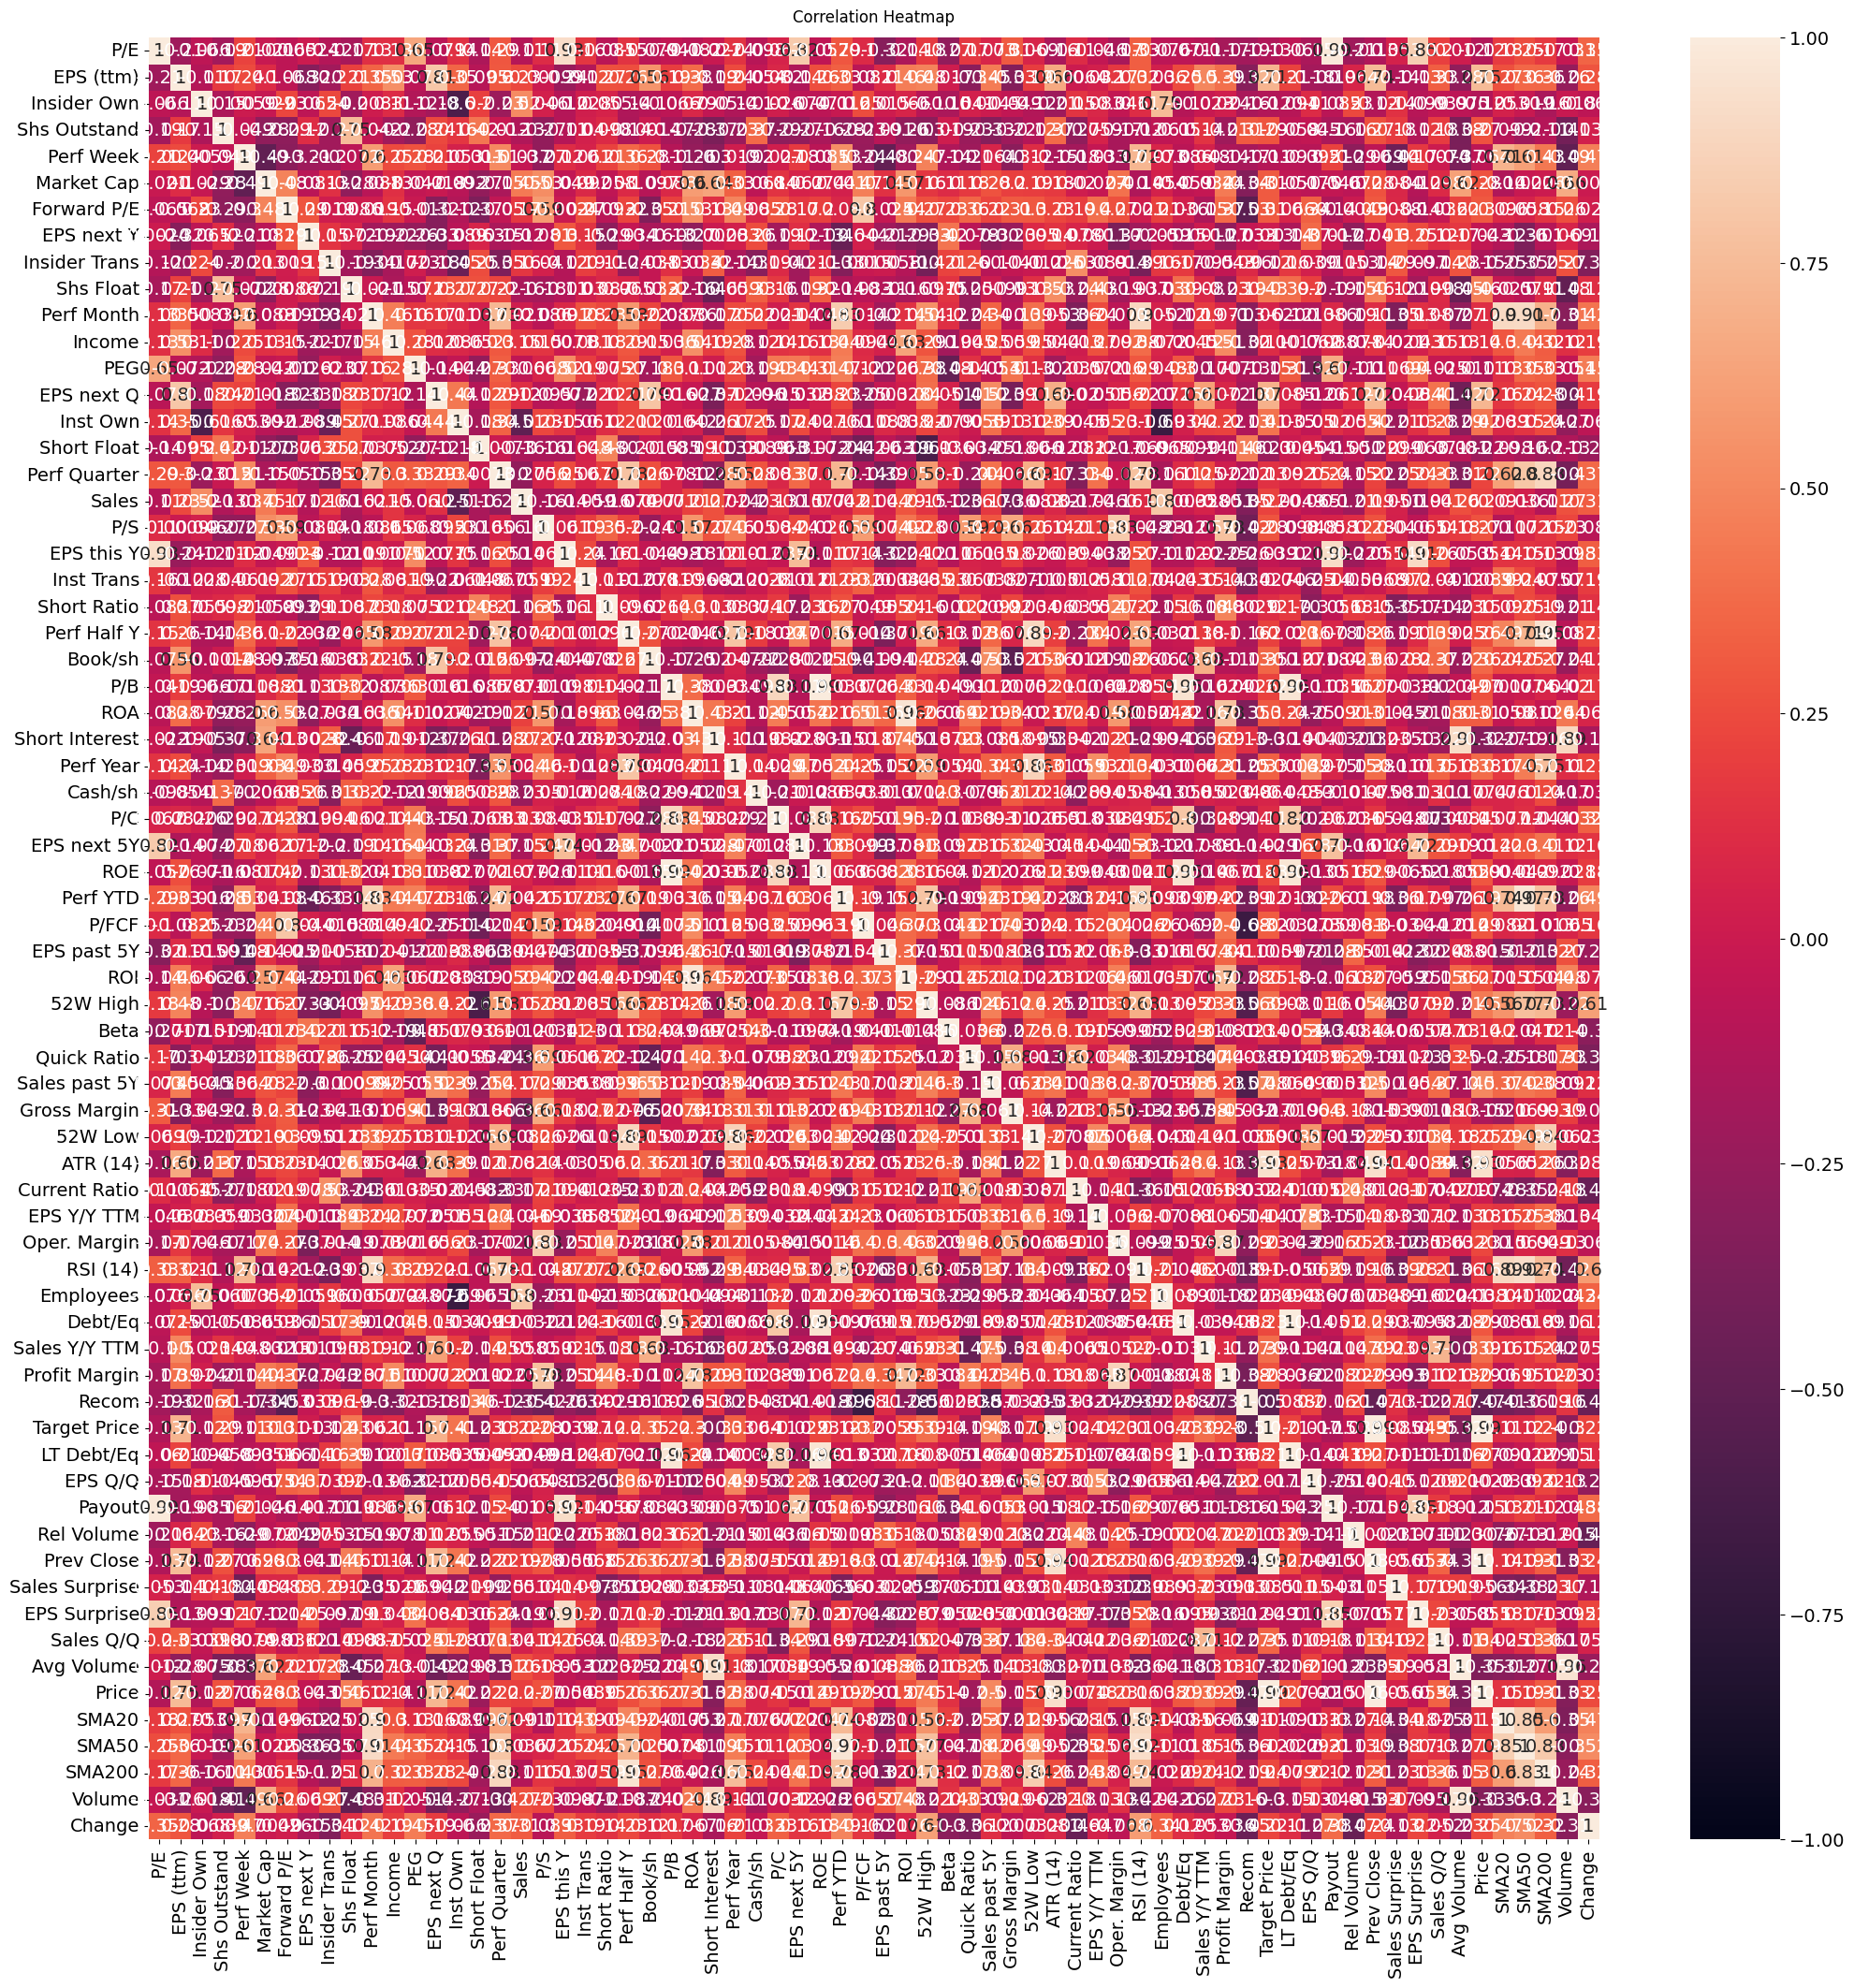

In [204]:

# Increase the size of the heatmap.

plt.figure(figsize=(25, 25)) 
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


In [205]:

# Some colunmns in our dataframe are seriously correlated (correlation > .9). This can present a bunch of probles with 
# our downstream analysis, including Multicollinarity, Redundancy, Overfitting, Model interpretability, Sensitivity to noise,
# Bias in feature importance, Increased computational complexity, etc.

# Given these issues, we will drop any features that have >.9 correlation with our target variable, which is 'Price'

# Assuming df is your DataFrame and 'Price' is the column to compare correlations with
price_corr = df.corr()['Price']  # Calculate correlations with 'Price'

# Assuming 'series' is your pandas Series
price_corr = price_corr.sort_values(ascending=False)

# Display the sorted Series
print(price_corr)


Price             1.000000
Prev Close        0.999934
Target Price      0.992274
ATR (14)          0.934528
EPS (ttm)         0.745083
EPS next Q        0.720754
Sales past 5Y     0.502893
Shs Float         0.462575
52W High          0.445232
Inst Own          0.416812
Sales Y/Y TTM     0.389520
Perf Year         0.377178
Book/sh           0.364347
Sales Q/Q         0.339109
SMA200            0.314804
ROA               0.313536
Forward P/E       0.302996
P/FCF             0.294414
Debt/Eq           0.291313
ROE               0.290119
Profit Margin     0.285073
Market Cap        0.276152
P/S               0.274965
Shs Outstand      0.274616
P/B               0.271793
ROI               0.271595
LT Debt/Eq        0.267229
Perf Half Y       0.262964
52W Low           0.249146
Change            0.248662
Oper. Margin      0.229132
Perf Quarter      0.219480
Sales             0.195560
SMA50             0.188570
Perf YTD          0.187194
EPS Y/Y TTM       0.183444
RSI (14)          0.161823
P

In [206]:

# Filter columns where correlation with 'Price' is greater than 0.95
columns_to_drop = price_corr[price_corr.abs() > 0.90].index.tolist()
print(columns_to_drop)

# Remove 'Price' from the list of columns to drop
columns_to_drop.remove('Price')

# Drop the columns from the DataFrame
df_fin = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df_fin.shape)
print(df_fin.columns)


['Price', 'Prev Close', 'Target Price', 'ATR (14)']
(29, 65)
Index(['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week',
       'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float',
       'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own', 'Short Float',
       'Perf Quarter', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans',
       'Short Ratio', 'Perf Half Y', 'Book/sh', 'P/B', 'ROA', 'Short Interest',
       'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE', 'Perf YTD',
       'P/FCF', 'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', '52W Low', 'Current Ratio',
       'EPS Y/Y TTM', 'Oper. Margin', 'RSI (14)', 'Employees', 'Debt/Eq',
       'Sales Y/Y TTM', 'Profit Margin', 'Recom', 'LT Debt/Eq', 'EPS Q/Q',
       'Payout', 'Rel Volume', 'Sales Surprise', 'EPS Surprise', 'Sales Q/Q',
       'Avg Volume', 'Price', 'SMA20', 'SMA50', 'SMA200', 'Volume', 'Change'],
      dtype='object')


In [168]:

print(df_fin.columns)


Index(['Price'], dtype='object')


<BarContainer object of 64 artists>

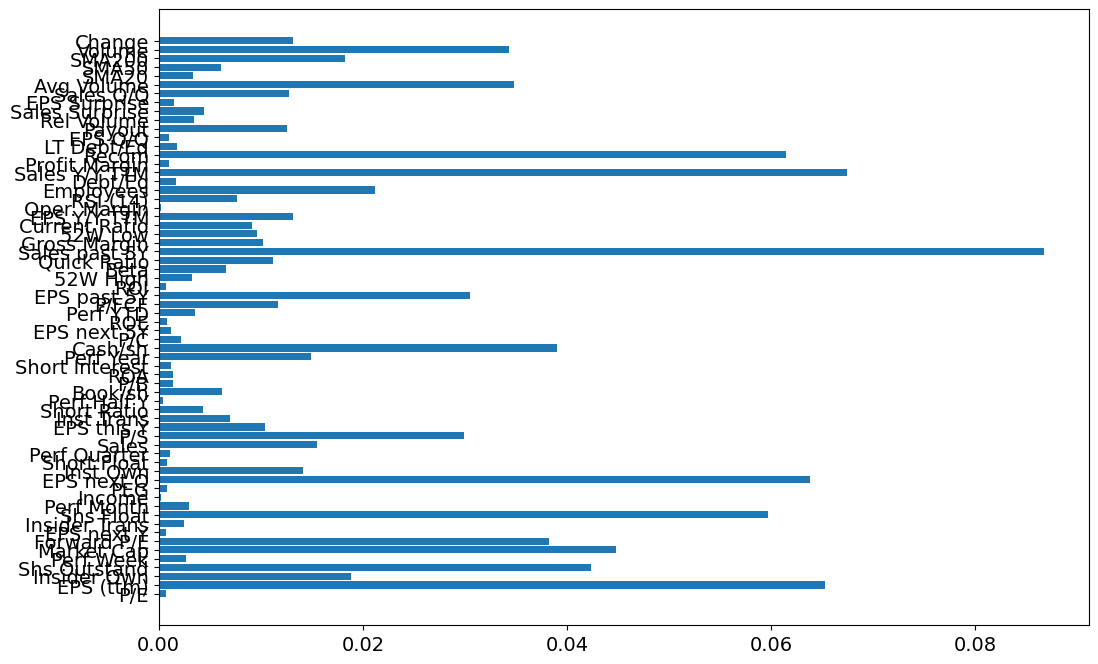

In [207]:

# Since a lot of the metrics (P/E, P/B, ROE, etc.) are already calculated for us, we can focus on the data scrience topics
# at this point. We will start with the RandomForestRegressor method now.

import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

 
# independent variables
X = df_fin[['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week',
       'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float',
       'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own', 'Short Float',
       'Perf Quarter', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans',
       'Short Ratio', 'Perf Half Y', 'Book/sh', 'P/B', 'ROA', 'Short Interest',
       'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE', 'Perf YTD',
       'P/FCF', 'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', '52W Low', 'Current Ratio',
       'EPS Y/Y TTM', 'Oper. Margin', 'RSI (14)', 'Employees', 'Debt/Eq',
       'Sales Y/Y TTM', 'Profit Margin', 'Recom', 'LT Debt/Eq', 'EPS Q/Q',
       'Payout', 'Rel Volume', 'Sales Surprise', 'EPS Surprise', 'Sales Q/Q',
       'Avg Volume', 'SMA20', 'SMA50', 'SMA200', 'Volume', 'Change']]

# dependent variable
y = df_fin['Price']

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)


In [180]:

# from IPython.display import Image
# from IPython.core.display import HTML 
# PATH = "C:\\Users\\ryan_\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Fundamental Analysis Using Regression Techniques\\"
# Image(filename = PATH + "2.JPG", width=800, height=800)


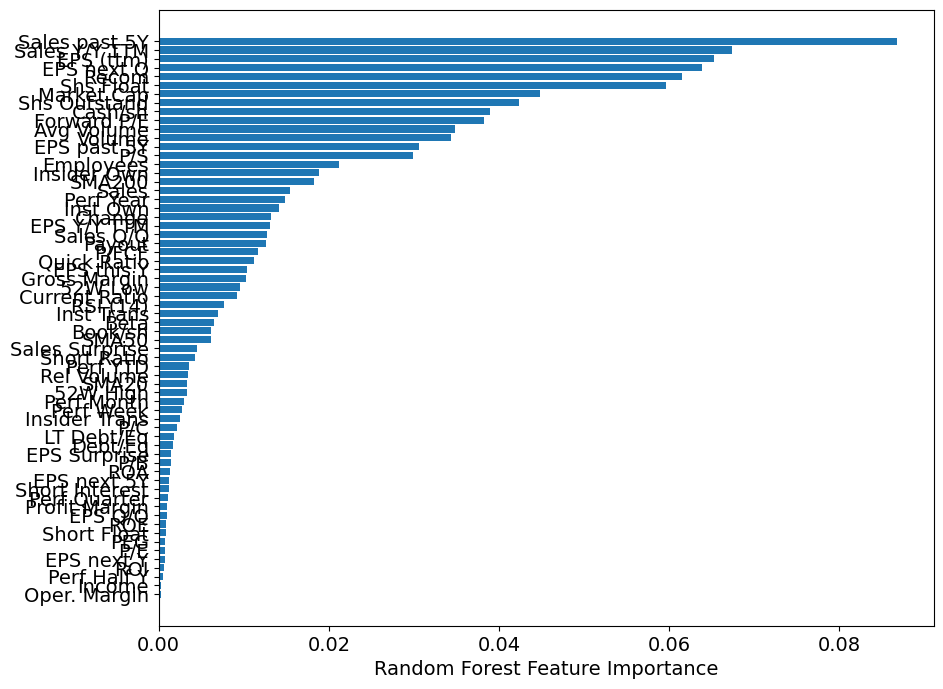

In [208]:

# This is nice, but a little hard to interpret due to the business and the data is not sorted in any particular order. 
# Let's address these issues.


# Sort feature importances in ascending order
sorted_idx = np.argsort(rf.feature_importances_)

# Rearrange feature names and importance values based on sorted indices
sorted_features = X.columns[sorted_idx]
sorted_importances = rf.feature_importances_[sorted_idx]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Random Forest Feature Importance")
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

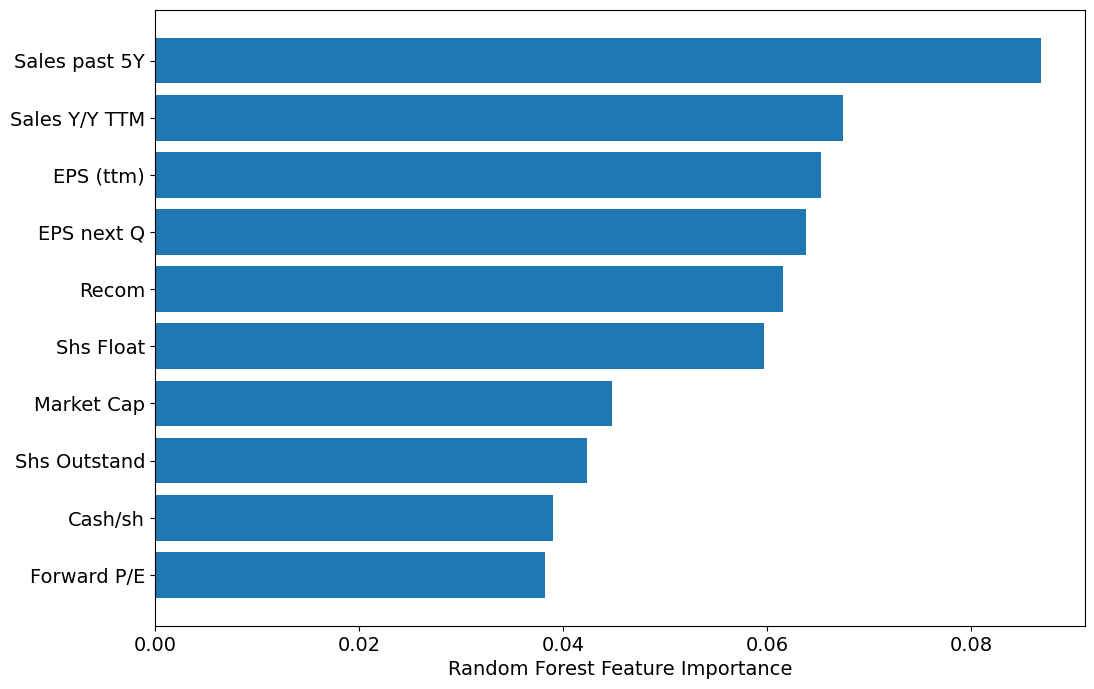

In [209]:

# This is definitely better, but it's still too much information. Let's focus on the top ten independent variables that 
# have the most impact on the dependent variable (Change). 


# last 10 items in array...too many to plot all...don't need items at the bottom..

sorted_idx = rf.feature_importances_.argsort()[-10:]
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


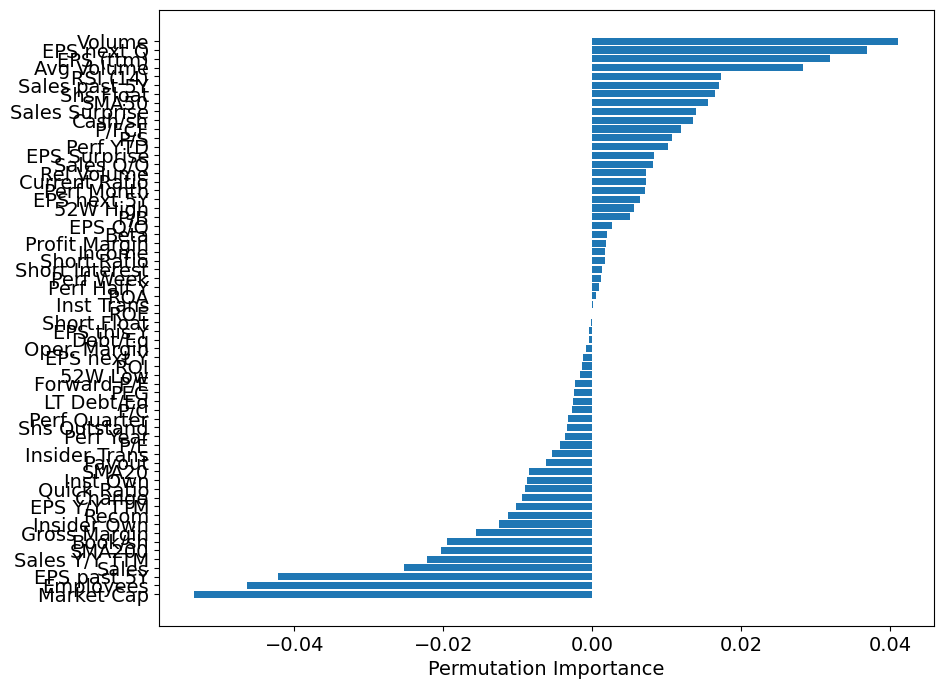

In [210]:

# Next we are considering permutation importance and we know that one should always use permutation importance over 
# feature importance, if the former is available, and in this case it is!


from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test)

# Sort the indices based on mean importance
sorted_idx = perm_importance.importances_mean.argsort()

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


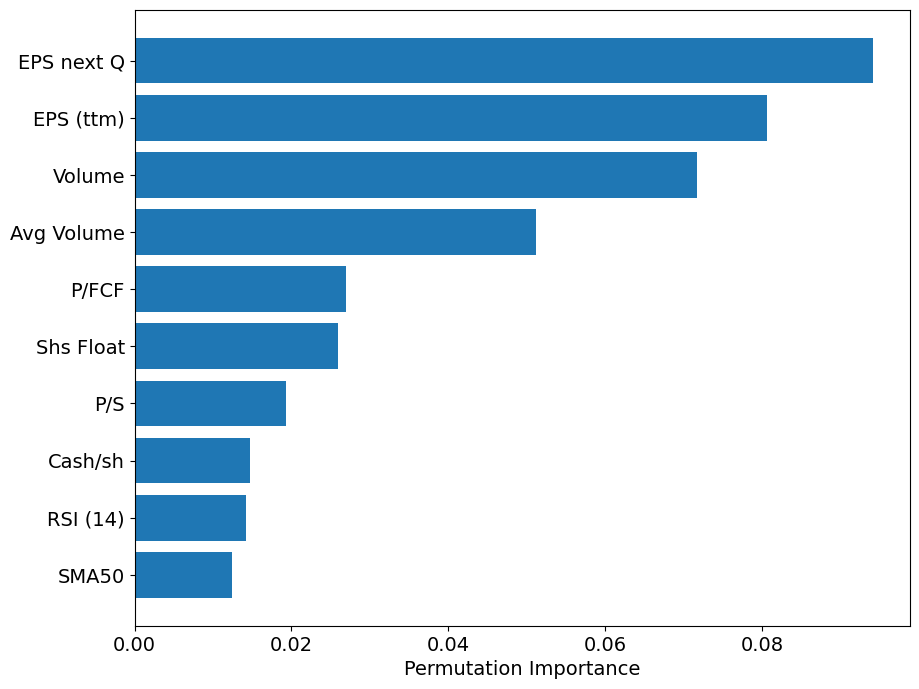

In [211]:

# Again, we will focus only on the top ten.


# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test)

# Sort the indices based on mean importance
sorted_idx = perm_importance.importances_mean.argsort()[-10:]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


In [ ]:

# Finally, explainable AI (XAI) is one of the hot topics in AI-ML. It refers to the tools and techniques that can be used 
# to help make any black-box machine learning tool, easier to understand by humans. There are many such tools available 
# in the market such as LIME, SHAP, etc. In this case, we will use SHAP (SHapley Additive exPlanations), which is a game-
# theory approach to explain the output of any machine learning model. It connects optimal credit allocation with local 
# explanations, using Shapley values from game theory and their related extensions. In coalition game theory, a group of 
# players comes together to create some value. You can think of a group of people coming together to form a company to 
# create some profit. Shapley value is a method to distribute this profit equally among the players/workers. So, basically, 
# we want to distribute any/all profit fairly among the players, based on their overall contributions to the team. 


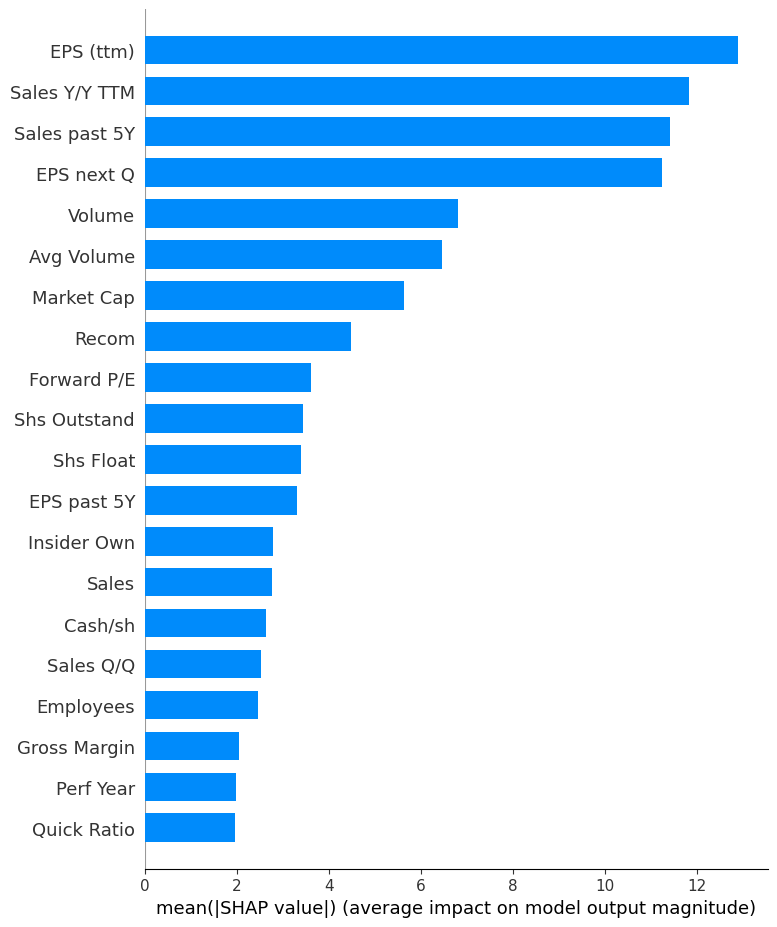

In [212]:

import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


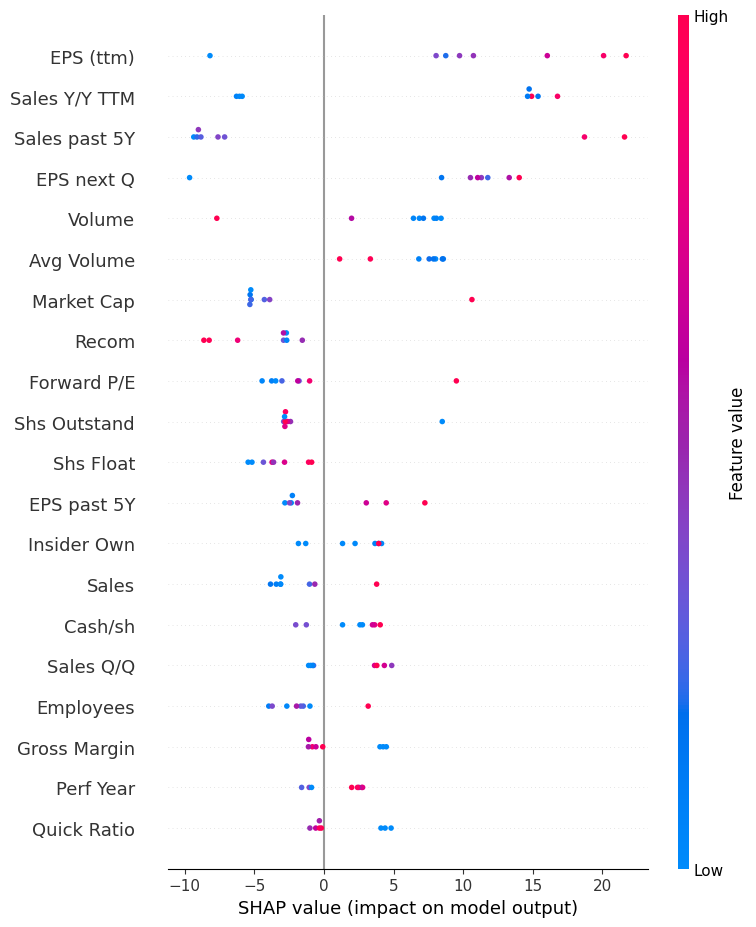

In [213]:

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)


Text(0.5, 0, 'Random Forest Feature Importance')

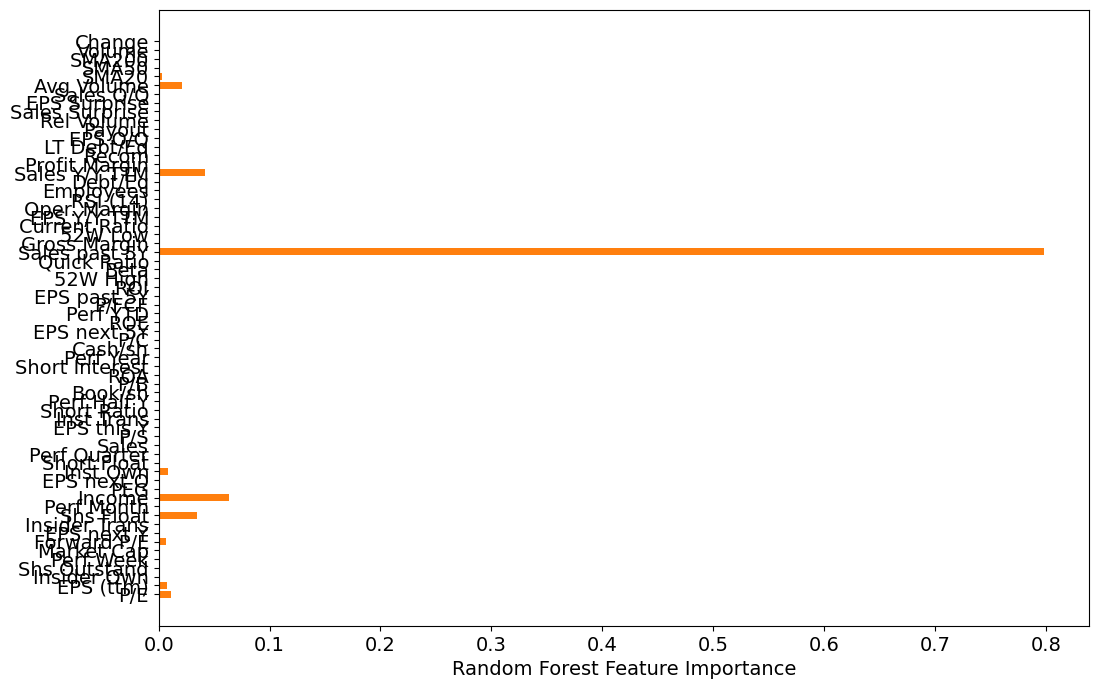

In [214]:

# moving on to the XGBRegressor method now...

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from xgboost import XGBRegressor

# independent variables 
X = df_fin[['P/E', 'EPS (ttm)', 'Insider Own', 'Shs Outstand', 'Perf Week',
       'Market Cap', 'Forward P/E', 'EPS next Y', 'Insider Trans', 'Shs Float',
       'Perf Month', 'Income', 'PEG', 'EPS next Q', 'Inst Own', 'Short Float',
       'Perf Quarter', 'Sales', 'P/S', 'EPS this Y', 'Inst Trans',
       'Short Ratio', 'Perf Half Y', 'Book/sh', 'P/B', 'ROA', 'Short Interest',
       'Perf Year', 'Cash/sh', 'P/C', 'EPS next 5Y', 'ROE', 'Perf YTD',
       'P/FCF', 'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', '52W Low', 'Current Ratio',
       'EPS Y/Y TTM', 'Oper. Margin', 'RSI (14)', 'Employees', 'Debt/Eq',
       'Sales Y/Y TTM', 'Profit Margin', 'Recom', 'LT Debt/Eq', 'EPS Q/Q',
       'Payout', 'Rel Volume', 'Sales Surprise', 'EPS Surprise', 'Sales Q/Q',
       'Avg Volume', 'SMA20', 'SMA50', 'SMA200', 'Volume', 'Change']]

# dependent variable
y = df_fin['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

 
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

xgb.feature_importances_

plt.barh(X.columns, xgb.feature_importances_)
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance") 


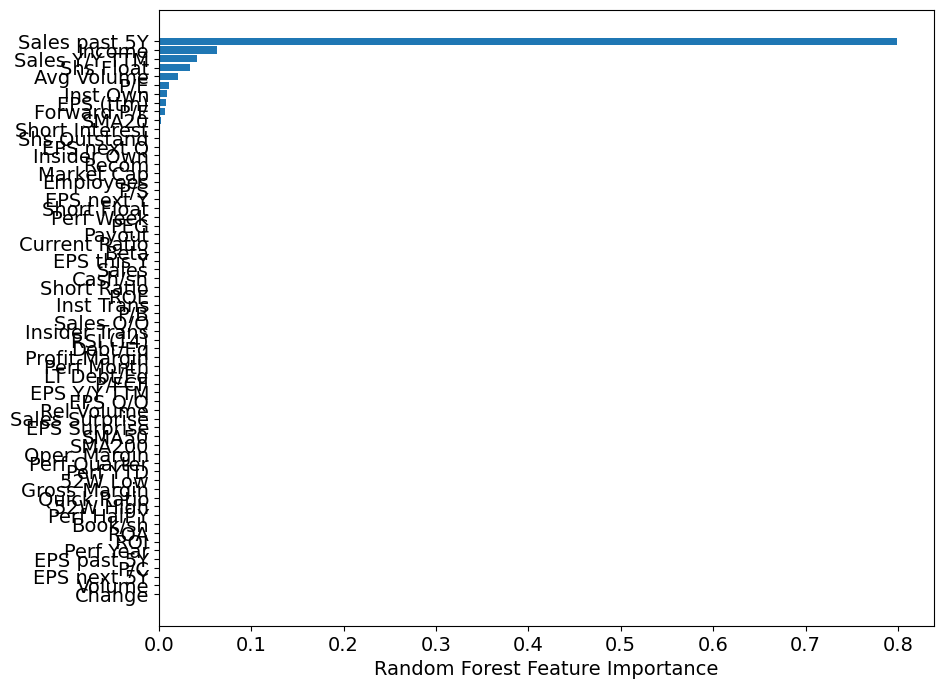

In [216]:

# Sort feature importances in ascending order
sorted_idx = np.argsort(xgb.feature_importances_)

# Rearrange feature names and importance values based on sorted indices
sorted_features = X.columns[sorted_idx]
sorted_importances = xgb.feature_importances_[sorted_idx]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Random Forest Feature Importance")
plt.show()


Text(0.5, 0, 'Random Forest Feature Importance')

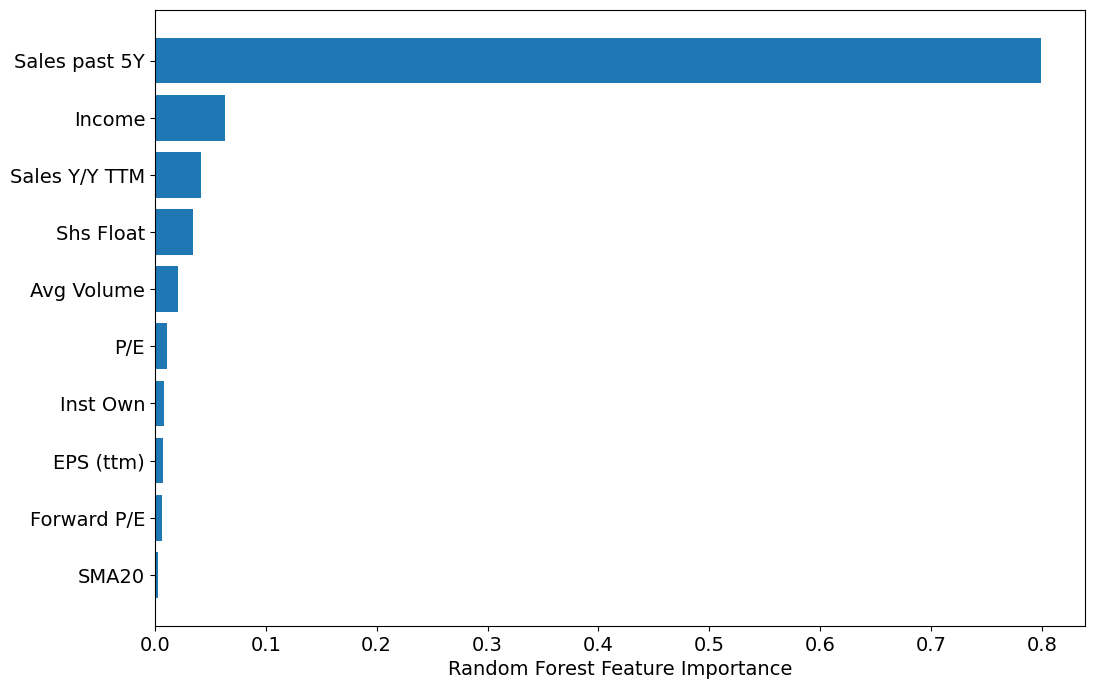

In [217]:

# last 10 items in array...too many to plot all...don't need items at the bottom..

sorted_idx = xgb.feature_importances_.argsort()[-10:]
plt.barh(X.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


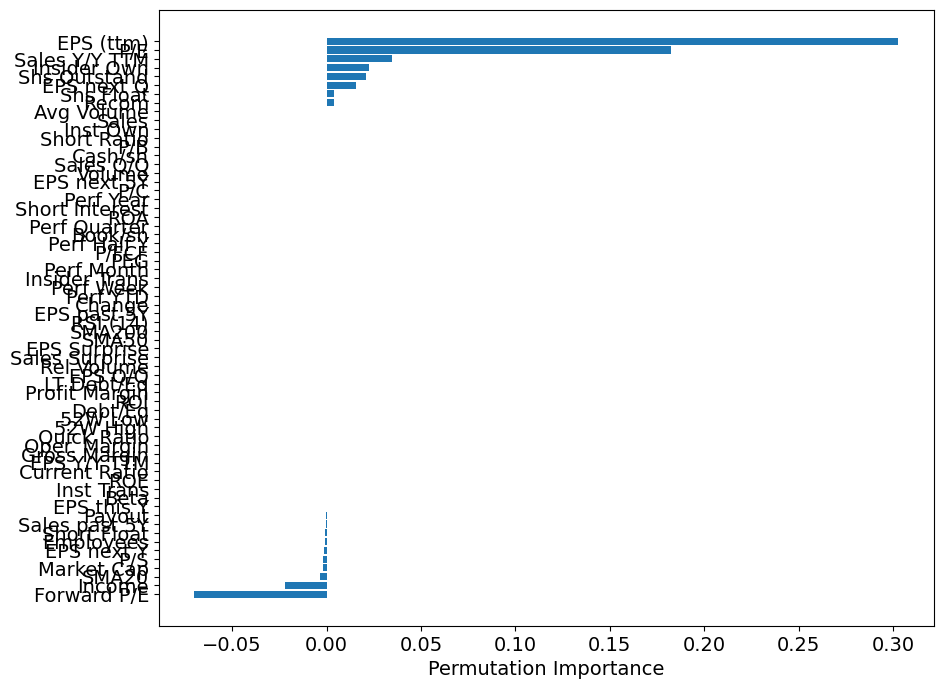

In [218]:

from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(xgb, X_test, y_test)

# Sort the indices based on mean importance
sorted_idx = perm_importance.importances_mean.argsort()

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


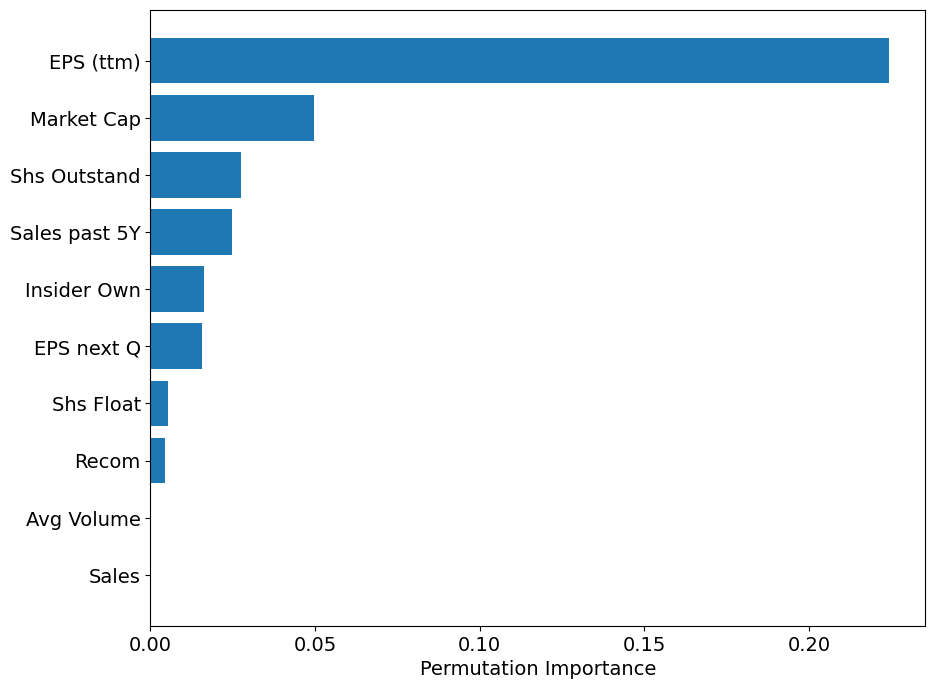

In [219]:

# Calculate permutation importance
perm_importance = permutation_importance(xgb, X_test, y_test)

# Sort the indices based on mean importance
sorted_idx = perm_importance.importances_mean.argsort()[-10:]

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()


[17:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


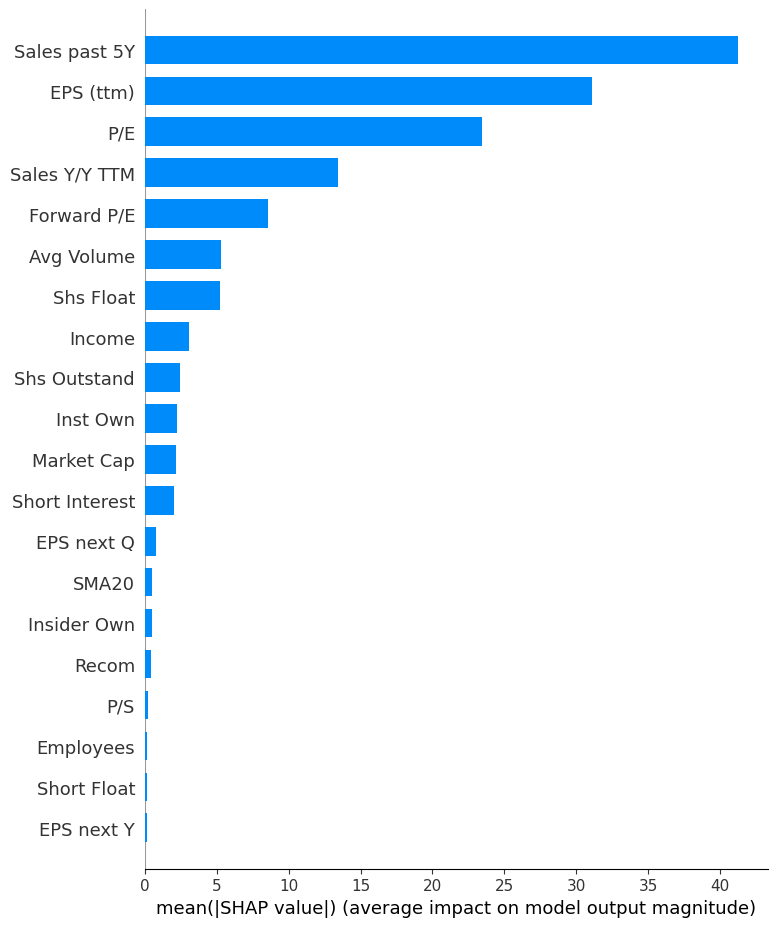

In [220]:

import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")


[17:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


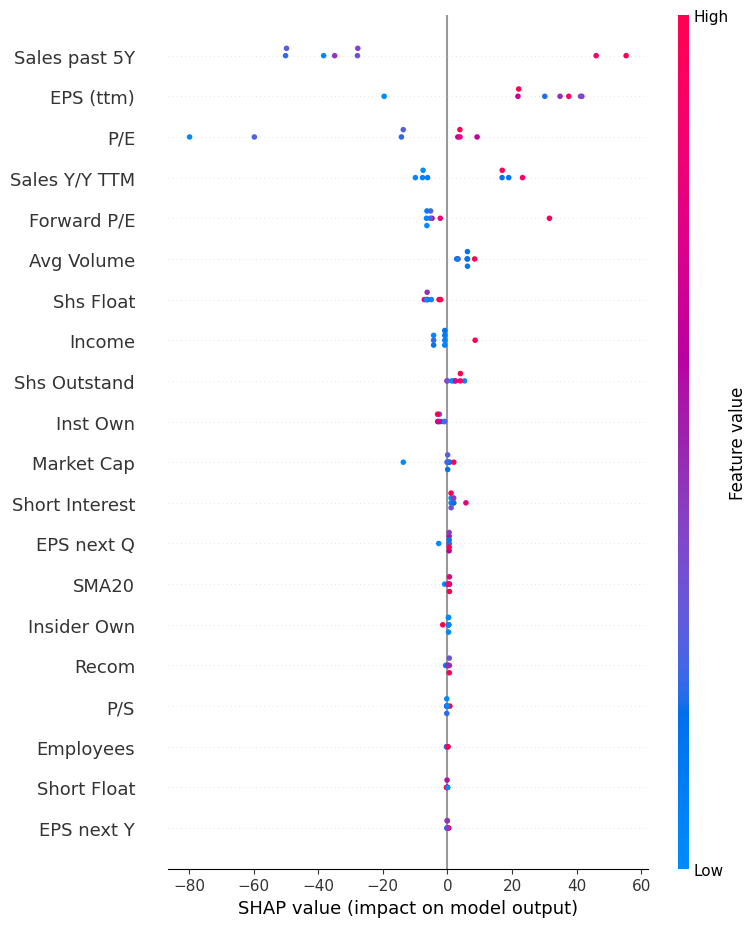

In [221]:

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)


In [55]:

# Now, let's see if any of this actually works. We'll switch back to the random forest feature importance exercise to 
# create a new dataframe with the top three most influential features ('Target Price', 'Prev Close', 'ATR (14)', 
# 'Sales past 5Y', 'Shs Float'). Then, we will sort this by the most influential feature, in descending order


In [226]:

df_rf_imp = df[['Sales past 5Y','EPS (ttm)','Sales Y/Y TTM','Shs Float','Recom']].copy()
df_rf_imp.sort_values(by='Sales past 5Y', ascending=False)
print(df_rf_imp.head())


   Sales past 5Y  EPS (ttm)  Sales Y/Y TTM  Shs Float  Recom
0          10.54      11.22          21.13     722.88   2.10
1           3.42      12.48           7.35     534.74   2.32
2           8.34       6.43          -0.47      15.43   2.16
3          -3.50      -3.67          16.80     609.20   1.73
4           5.49      20.14          12.84     507.88   2.44


In [223]:

# Let's copy over the Index and the Price (y-variable) from the original dataframe, named 'df'. Then, we will merge this 
# object with the object named 'df_rf_imp', which is what we derived based on our regression analysis. Finally, we will 
# merge all of this with 'df_index', so we know what securities we are looking at.

df_price = df[['Price']].copy()

merged_df = df_price.merge(df_rf_imp, left_index=True, right_index=True)
merged_df = df_index.merge(merged_df, left_index=True, right_index=True)
merged_df = merged_df.sort_values(by='Sales past 5Y', ascending=False)
merged_df


Index   Price  Sales past 5Y  EPS (ttm)  Sales Y/Y TTM  Shs Float  Recom
23   CRM  289.72          24.01       2.63          12.08     937.16   1.64
7     GS  384.44          18.09      22.82          62.88     324.31   1.92
14   JPM  179.03          14.90      16.22          54.49       2.86   1.65
18  MSFT  404.06          14.05      11.06          11.51       7.32   1.20
6    CVX  154.63          11.15      11.35         -16.51       1.88   1.62
0    AXP  212.56          10.54      11.22          21.13     722.88   2.10
22   UNH  521.55          10.48      23.85          14.64     923.31   1.52
8     HD  362.35          10.07      15.58          -2.27     992.49   2.05
25     V  278.56           9.98       8.55          10.48       1.58   1.55
28   DIS  111.60           8.74       1.63           5.35       1.83   1.77
2   AAPL  182.31           8.34       6.43          -0.47      15.43   2.16
17   MRK  127.79           7.81       0.13           3.10       2.53   1.54
19   NKE  103.51           7.34       3.42           4.79       1.18   2.11
21   TRV  217.53           6.52      12.84          12.12     228.24   2.46
13    KO   59.39           6.49       2.47           6.89       4.30   1.64
4    CAT  321.91           5.49      20.14          12.84     507.88   2.44
15   MCD  292.02           4.44      11.57           9.97     724.84   1.70
27   WMT  170.36           4.43       6.02           6.44       1.44   1.45
20    PG  157.51           4.20       5.97           4.55       2.35   1.85
1   AMGN  283.70           3.42      12.48           7.35     534.74   2.32
5   CSCO   48.44           3.06       3.29           7.66       4.05   2.68
26   WBA   21.98           1.35       0.66           7.73     711.07   3.00
12   JNJ  156.55           1.16       5.58          -2.10       2.40   2.14
24    VZ   40.49           0.50       2.76          -2.09       4.20   2.32
16   MMM   91.25           0.13     -12.63          -4.52     552.10   3.05
9    HON  197.17          -2.28       8.47           3.37     658.70   2.04
3     BA  203.89          -3.50      -3.67          16.80     609.20   1.73
10   IBM  187.64          -3.97       8.13           2.20     912.24   2.68
11  INTC   43.51          -4.59       0.39         -14.00       4.23   2.93

In [ ]:

# Ok, let's look at the top 5 securities and see what the price /performance was over the last 3 months:
# 'CRM', 'GS', 'JPM', 'MSFT', and 'CVX'
# In this scenario, an investor would have made around 15.65% return in the past 3 months.


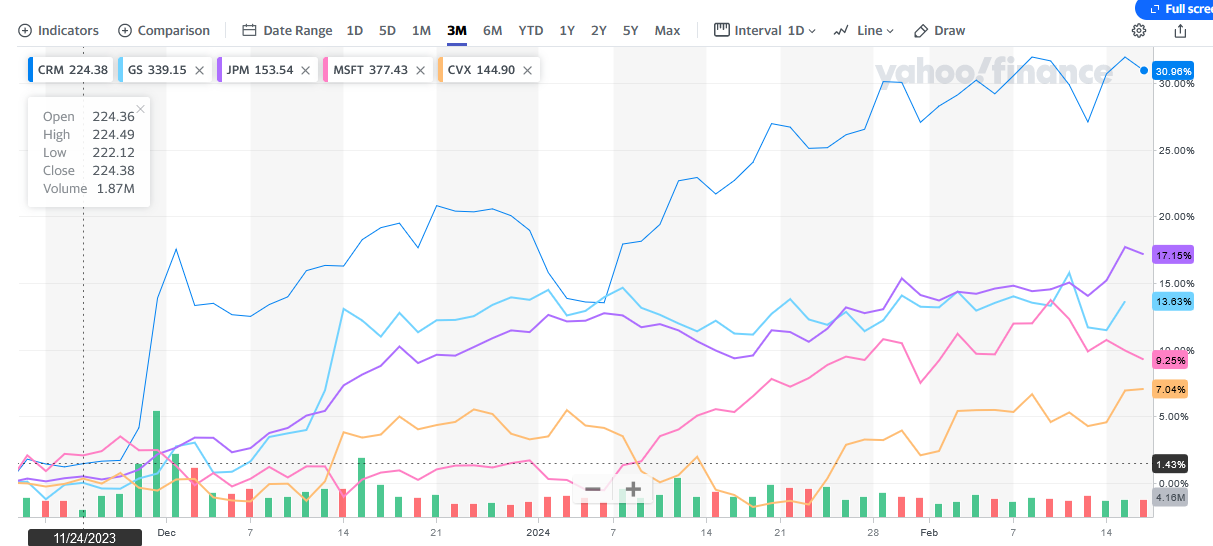

In [227]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\ryan_\\Fundamental Analysis Using Regression Techniques\\"
Image(filename = PATH + "performance1.JPG", width=1000, height=800)


In [ ]:

# Ok, let's look at the bottom 5 securities and see what the price /performance was over the last 3 months:
# 'MMM', 'HON', 'BA', 'IBM', and 'INTC'
# In this scenario, an investor would have made around 4.14% return in the past 3 months.


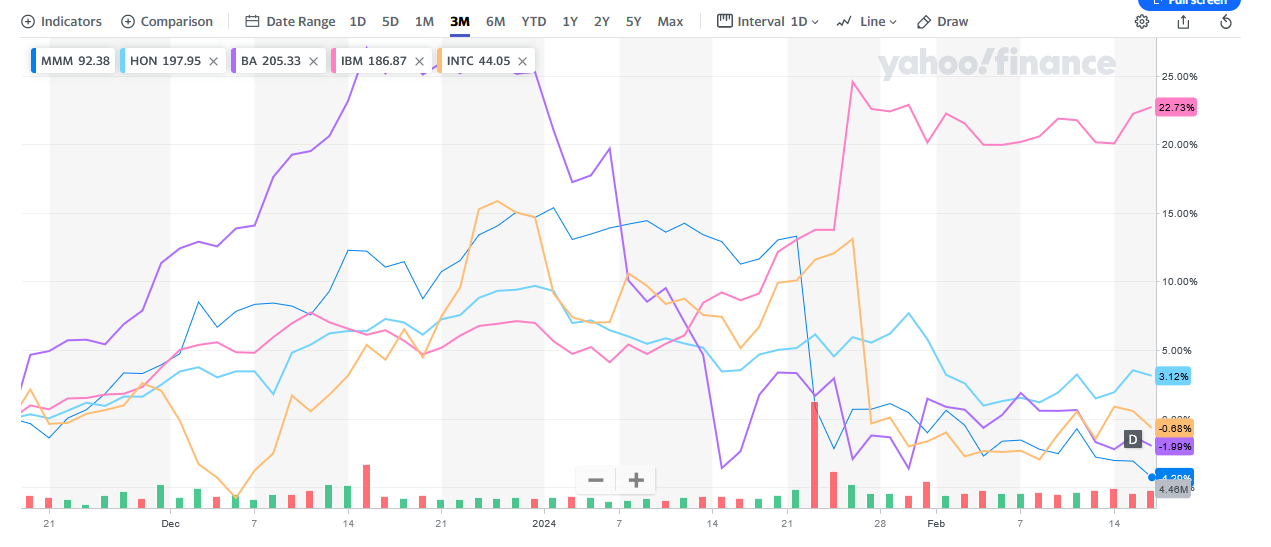

In [230]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\Fundamental Analysis Using Regression Techniques\\"
Image(filename = PATH + "performance2.JPG", width=1000, height=800)


In [ ]:

# END...
